<a href="https://colab.research.google.com/github/erppjr/El-Desaf-o-Iris/blob/main/Desaf%C3%ADo_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafío Iris


# FASE 1: EXPLORACIÓN DEL JARDÍN BOTÁNICO



In [16]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


In [17]:
# 1. Carga del Dataset
iris = load_iris()


In [18]:
# 2. Convertimos los datos de las características (X) a un DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)


# Añadimos las etiquetas (y) al DataFrame.
# Creamos una columna 'species' con los nombres de las especies para que sea interpretable en la visualización.

df['species'] = iris.target
df['species'] = df['species'].map(lambda x: iris.target_names[x])


Se convierten las características numéricas (longitud y ancho de sépalos y pétalos) en columnas con nombres descriptivos.

Se añade la columna species con los nombres de las especies (setosa, versicolor, virginica) a partir de las etiquetas numéricas originales.

De esta forma el dataset queda en un formato legible e interpretable, ideal para análisis, visualización y como variable objetivo en el modelo supervisado.

In [19]:
# 3. Análisis Exploratorio

# 3.a. head()
print("\nDataFrame - Primeras 5 filas (.head()):")
print(df.head())

# 3.b. info()
print("\nInformación general del DataFrame (.info()):")
df.info()

# 3.c. describe()
print("\nEstadísticas Descriptivas (.describe()):")
print(df.describe())



DataFrame - Primeras 5 filas (.head()):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Información general del DataFrame (.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm) 

Realizamos un análisis exploratorio inicial del dataset para conocer su estructura y valores:

* *.head()* muestra las primeras 5 filas del DataFrame, útil para ver ejemplos concretos de los datos.

* .*info()* entrega información general sobre las columnas, tipo de datos y si existen valores nulos.

* *.describe()* calcula estadísticas descriptivas (media, desviación estándar, mínimos, máximos, percentiles) para cada característica numérica.

Esto nos permite obtener una visión general del dataset antes de aplicar algoritmos de Machine Learning.

<Figure size 1200x1200 with 0 Axes>

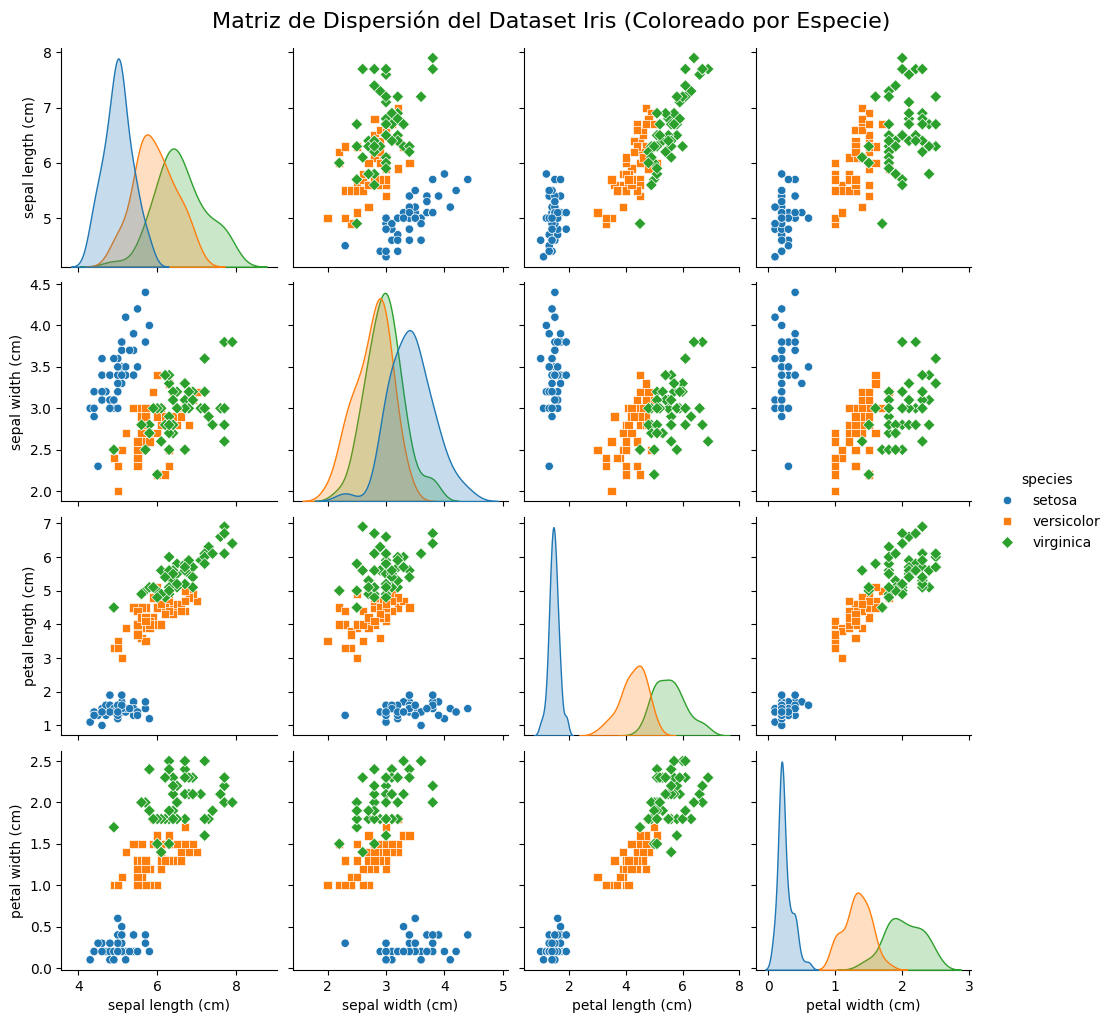

In [20]:
# Visualización Clave: pairplot

# Generamos el pairplot, coloreando cada punto por su especie real (hue='species').

plt.figure(figsize=(12, 12))
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Matriz de Dispersión del Dataset Iris (Coloreado por Especie)", y=1.02, fontsize=16)
plt.show()


Creamos un pairplot para visualizar cómo se relacionan entre sí todas las características del dataset:

* Cada punto representa una flor y está coloreado según su especie (hue='species'), lo que permite identificar visualmente grupos y patrones.

* El gráfico muestra todas las combinaciones posibles de características (scatterplots) y ayuda a ver qué especies son más fáciles de separar.

Esta visualización es clave para intuir la estructura de los datos antes de entrenar modelos supervisados o aplicar clustering.

---

### **Pregunta de Análisis 1**: Observando el pairplot, ¿parece que las especies forman grupos visualmente separables? ¿Hay alguna especie que sea más fácil de distinguir que las otras? Esta intuición visual es lo que intentaremos que nuestros algoritmos aprendan y descubran.

Al observar la **matriz de dispersión (pairplot)** del dataset *Iris*, se pueden sacar varias conclusiones:



####  Separabilidad general de las especies

- La especie **Setosa (azul)** se distingue con mucha claridad del resto, sobre todo en las variables relacionadas con el pétalo (*petal length* y *petal width*).  
  Sus medidas son mucho más pequeñas y forman un grupo bien definido y separado.  

- Las especies **Versicolor (naranja)** y **Virginica (verde)** muestran más solapamiento, especialmente en las dimensiones del sépalo (*sepal length* y *sepal width*).  
  Sin embargo, se separan mejor en los ejes de *petal length* y *petal width*, aunque todavía con cierta zona intermedia donde se mezclan.  



####  Especie más fácil de distinguir

- **Setosa** es la más fácil de separar: forma un clúster compacto y aislado.  
- En cambio, **Versicolor** y **Virginica** son más difíciles de distinguir entre sí: se superponen bastante en varias proyecciones, sobre todo en las dimensiones del sépalo.  



### En resumen:
- **Setosa** se separa claramente y es la más fácil de identificar.  
- **Versicolor y Virginica** tienen más similitudes y requieren criterios más finos (o algoritmos más complejos) para diferenciarse bien.  


# FASE 2: ENTRENAMIENTO DEL CLASIFICADOR (APRENDIZAJE SUPERVISADO)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [22]:
# 1. Preparación de Datos

# Separamos las características (X) de la variable objetivo (y, la especie)
# X contiene las medidas de los pétalos y sépalos (features)
X = df.drop('species', axis=1)
# y contiene la etiqueta objetivo (Clase/Etiqueta)
y = df['species']

print(f"Dimensiones de las Características (X): {X.shape}")
print(f"Dimensiones de las Etiquetas (y): {y.shape}")

# Dividimos el dataset en conjuntos de entrenamiento (80%) y prueba (20%)
# Esto asegura que el rendimiento del modelo se evalúe sobre datos no vistos
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 20% para prueba, 80% para entrenamiento
    random_state=42, # Semilla para asegurar resultados reproducibles
    stratify=y       # Mantiene la proporción de especies en ambos conjuntos
)

print(f"Tamaño del conjunto de Entrenamiento (80%): {X_train.shape} muestras")
print(f"Tamaño del conjunto de Prueba (20%): {X_test.shape} muestras")

Dimensiones de las Características (X): (150, 4)
Dimensiones de las Etiquetas (y): (150,)
Tamaño del conjunto de Entrenamiento (80%): (120, 4) muestras
Tamaño del conjunto de Prueba (20%): (30, 4) muestras


Preparamos los datos para entrenar el modelo supervisado:

* Se separan las características (X) de la variable objetivo (y) para que el modelo sepa qué predecir.

* *train_test_split* divide los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%), permitiendo evaluar el rendimiento del modelo sobre datos no vistos.

* *random_state* asegura reproducibilidad y stratify=y mantiene la proporción de especies en ambos conjuntos.

Esto garantiza que el modelo aprenda correctamente y que la evaluación sea representativa y confiable.

In [23]:
#2. Construcción y Entrenamiento del Modelo

# Utilizamos un Árbol de Decisión, que es un clasificador interpretable .
# El modelo de Aprendizaje Supervisado aprende de datos etiquetados (X_train, y_train)

dt_classifier = DecisionTreeClassifier(random_state=42)


# entrena el modelo del Árbol de Decision
dt_classifier.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

Construimos y entrenamos el modelo de Aprendizaje Supervisado:

* Creamos un Árbol de Decisión (*DecisionTreeClassifier*), un clasificador interpretable que aprende reglas a partir de los datos.

* Usamos *.fit(X_train, y_train)* para que el modelo aprenda la relación entre las características de las flores y sus especies.

Después de este paso, el modelo está listo para predecir la especie de flores nuevas y evaluar su precisión.

In [24]:
# 3. Evaluación del Modelo

# Realizamos predicciones sobre el conjunto de prueba (X_test), que el modelo nunca ha visto
y_pred = dt_classifier.predict(X_test)

# Calculamos la precisión (Accuracy), que es la proporción de predicciones correctas
accuracy = accuracy_score(y_test, y_pred)

print(f"\nResultados de la Evaluación en el conjunto de Prueba (20%):")
print(f"Predicciones (Primeras 5): {y_pred[:5]}")
print(f"Etiquetas Reales (Primeras 5): {y_test.head().values}")

print("\n" + "-"*50)
print(f"Precisión (Accuracy) del Árbol de Decisión: {accuracy:.4f} ({accuracy*100:.2f}%)")





Resultados de la Evaluación en el conjunto de Prueba (20%):
Predicciones (Primeras 5): [np.str_('setosa') np.str_('virginica') np.str_('versicolor')
 np.str_('versicolor') np.str_('setosa')]
Etiquetas Reales (Primeras 5): [np.str_('setosa') np.str_('virginica') np.str_('versicolor')
 np.str_('versicolor') np.str_('setosa')]

--------------------------------------------------
Precisión (Accuracy) del Árbol de Decisión: 0.9333 (93.33%)


Vvaluamos el rendimiento del Árbol de Decisión:

* Usamos *.predict(X_test*) para obtener las predicciones sobre datos que el modelo no ha visto, simulando su desempeño en casos reales.

* Calculamos la precisión (accuracy) *con accuracy_score*, que indica qué proporción de predicciones fueron correctas.

* Se imprimen ejemplos de predicciones frente a las etiquetas reales para verificar visualmente el funcionamiento del modelo.

Este análisis permite medir si el modelo aprendió correctamente y responde directamente a la pregunta sobre su rendimiento.

---

# Respuesta Pregunta de Análisis 2

## 1. Precisión Obtenida y Evaluación del Modelo
La precisión (*Accuracy*) obtenida del Árbol de Decisión en el conjunto de prueba es del **0.9333**, o un **93.33%** [*Precisión (Accuracy) del Árbol de Decisión: 0.9333 (93.33%)*].

Considerando que la precisión (*Accuracy*) es la proporción de predicciones correctas sobre el total de predicciones, un valor del **93.33%** indica que el modelo clasifica correctamente una gran mayoría de las flores en el conjunto de prueba. Esto sugiere que el modelo ha tenido un **rendimiento muy bueno** y ha logrado generalizar las características de las especies a datos que no había visto previamente durante el entrenamiento.

El hecho de que las primeras cinco predicciones (**setosa, virginica, versicolor, versicolor, setosa**) coincidan perfectamente con las etiquetas reales en el conjunto de prueba, también respalda esta alta tasa de rendimiento.

## 2. Información Clave que Permitió el Aprendizaje
El algoritmo pudo aprender a clasificar las flores con esta alta precisión gracias a que la **Fase 2** se basa en el paradigma del **Aprendizaje Supervisado** (*Supervised Learning*).

La información clave proporcionada al modelo durante el entrenamiento, que es la esencia del aprendizaje supervisado, fueron las **etiquetas**:

1. **Datos Etiquetados**: El Aprendizaje Supervisado entrena el modelo utilizando datos etiquetados (**Datos + Etiquetas**). En este contexto, esto significa que, para cada flor, se le proporcionó al Árbol de Decisión tanto sus **características** (X: como la longitud y ancho del sépalo y el pétalo) como la **respuesta correcta** (la variable objetivo o clase/etiqueta), que es la especie real (**setosa, versicolor, virginica**).

2. **Meta de Clasificación**: La tarea de clasificación es precisamente la de asignar una **etiqueta discreta** a una muestra. Al darle las etiquetas de las especies, el modelo pudo aprender a partir de etiquetas existentes, identificando los patrones en las características que definen a cada especie y permitiéndole predecir la clase de nuevas instancias.

En resumen, el éxito del **93.33%** se debe a que el modelo fue supervisado, es decir, se le enseñó la relación directa entre las características físicas de la flor y su identidad de especie, lo que le permitió actuar como un **"Taxónomo Experto"**.

# FASE 3:

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns




Calculando inercia para el Método del Codo...


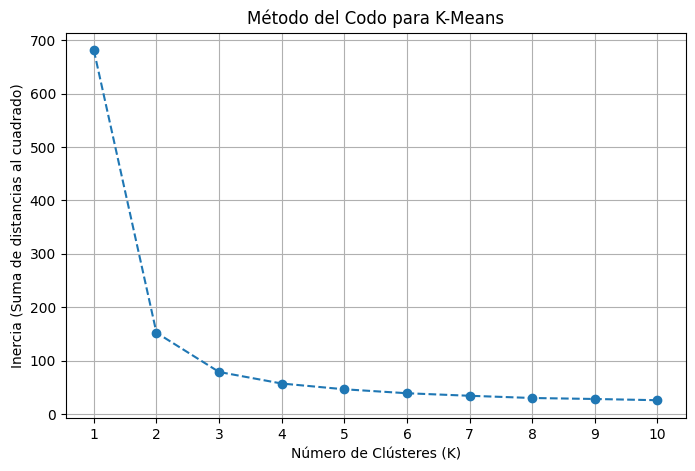


Valor óptimo de K sugerido por el 'codo': 3


In [26]:
# 1. Determinando el Número de Grupos (K) - Método del Codo


# El Aprendizaje No Supervisado requiere que se le indique el número de grupos (k) a buscar
# Usamos el Método del Codo para encontrar el k óptimo.

inertia = []
K_range = range(1, 11) # Rango de 1 a 10 grupos

print("Calculando inercia para el Método del Codo...")

for k in K_range:
    # random_state asegura que los resultados de K-Means sean reproducibles
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) # La inercia es la suma de las distancias al cuadrado dentro del clúster

# Graficamos el Método del Codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia (Suma de distancias al cuadrado)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# Observando el gráfico, el codo (punto donde la inercia deja de caer abruptamente)
# se espera que esté en K=3. Este valor es el que se usa a continuación.
K_optimo = 3
print(f"\nValor óptimo de K sugerido por el 'codo': {K_optimo}")

determinamos el número óptimo de clústeres (K) para K-Means usando el Método del Codo:

* Iteramos sobre distintos valores de K (1 a 10) y calculamos la inercia, que mide la suma de distancias al cuadrado de los puntos respecto a sus centroides.

* Graficamos la inercia en función de K; el “codo” del gráfico indica el valor de K donde añadir más clústeres deja de mejorar significativamente la agrupación.

Observando el gráfico, el codo aparece en K = 3, que es coherente con el número real de especies en el dataset Iris y será usado para el clustering.

In [27]:
# 2. Aplicación de K-Means


print(f"Aplicando K-Means con K = {K_optimo}...")
# Ejecutamos el algoritmo sobre todas las características (X)
kmeans_model = KMeans(n_clusters=K_optimo, random_state=42, n_init=10)
kmeans_model.fit(X)

# Obtenemos las etiquetas asignadas por el algoritmo a cada flor
cluster_labels = kmeans_model.labels_
# Obtenemos las coordenadas de los centroides de los clústeres
centroids = kmeans_model.cluster_centers_

# Añadimos la columna de etiquetas de clúster al DataFrame para la visualización
df['cluster'] = cluster_labels

Aplicando K-Means con K = 3...


Aplicamos el algoritmo K-Means para agrupar las flores:

* Creamos el modelo con K = 3 (valor óptimo del Método del Codo) y lo entrenamos sobre todas las características (X).

* Obtenemos las etiquetas de clúster asignadas a cada flor (cluster_labels) y los centroides de cada grupo.

* Añadimos estas etiquetas al DataFrame (df['cluster']) para poder visualizar y comparar los clústeres con las especies reales.

Esto permite explorar cómo el aprendizaje no supervisado descubre estructuras ocultas en los datos sin usar las etiquetas reales.

Generando visualización de los clústeres y centroides...


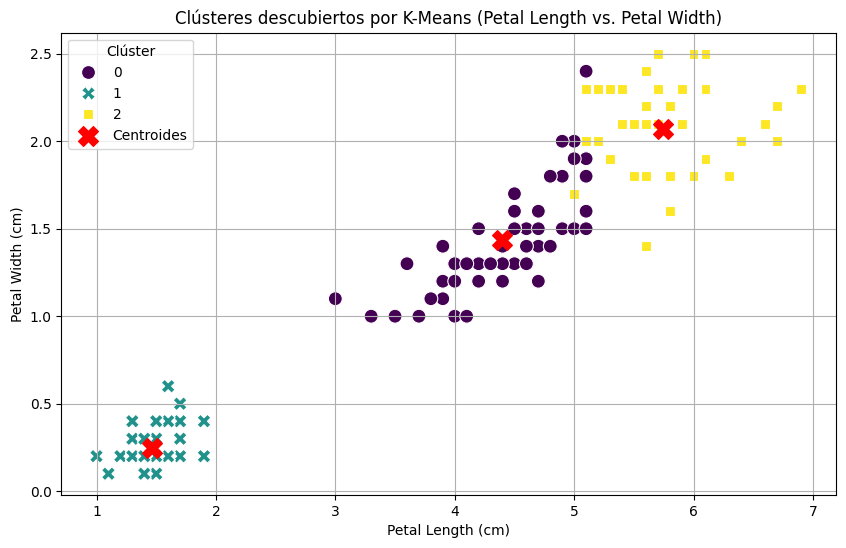

In [28]:
# 3. Visualización de los Clústeres

print("Generando visualización de los clústeres y centroides...")

# Usamos dos características clave, como petal length y petal width, para la visualización
plt.figure(figsize=(10, 6))

# Gráfico de dispersión, coloreado por la etiqueta de clúster encontrada (Aprendizaje No Supervisado)
sns.scatterplot(
    x=df['petal length (cm)'],
    y=df['petal width (cm)'],
    hue=df['cluster'],
    palette='viridis',
    style=df['cluster'],
    s=100,
    legend='full'
)

# Añadimos los centroides (los centros de cada clúster)
plt.scatter(
    centroids[:, X.columns.get_loc('petal length (cm)')],
    centroids[:, X.columns.get_loc('petal width (cm)')],
    marker='X',
    s=200,
    color='red',
    label='Centroides'
)

plt.title('Clústeres descubiertos por K-Means (Petal Length vs. Petal Width)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

Visualizamos los resultados del clustering de K-Means:

* Se crea un scatter plot usando petal length y petal width, coloreando cada punto según la etiqueta de clúster asignada.

* Se muestran los centroides de cada clúster con un marcador diferente (X rojo) para identificar el “centro” de cada grupo.

Esta visualización permite comparar visualmente los clústeres descubiertos con la estructura real de las especies, mostrando qué tan bien el aprendizaje no supervisado separa los grupos.

---

# Respuesta a la Pregunta de Análisis 3

## 1. Valor Sugerido para $k$
El **Método del Codo** (*Elbow Method*) sugiere típicamente que el valor óptimo para $k$ en el dataset Iris es **$k = 3$**.

El Método del Codo analiza cómo disminuye la **inercia** (la suma de las distancias al cuadrado de los puntos a sus centroides) a medida que aumentamos el número de clústeres ($k$). El punto donde la disminución se vuelve marginal, formando una curva similar a un **"codo"** en la gráfica, es el valor óptimo de $k$.

## 2. La Coincidencia Interesante
Sí, este hallazgo es una **coincidencia extremadamente interesante** y crucial para la misión.

Esta coincidencia no es aleatoria: el algoritmo de **Aprendizaje No Supervisado**, operando completamente **"a ciegas"** (sin conocer las etiquetas o la columna *species*), ha logrado descubrir independientemente la **estructura oculta** que ya sabíamos que existía en el dataset.

- **Contexto Supervisado (Fase 2)**: En la Fase 2 (Supervisada), utilizamos un **Árbol de Decisión** para clasificar el dataset, el cual ya estaba etiquetado con las **tres especies reales** de flores (*Iris setosa*, *Iris versicolor*, *Iris virginica*).
- **Contexto No Supervisado (Fase 3)**: En la Fase 3, el algoritmo **K-Means** solo recibió las **características** (longitudes y anchos de pétalos y sépalos) sin la columna de etiquetas. A pesar de esta falta de supervisión, el Método del Codo indica que el número de grupos más lógicamente separados por similitud es **tres**.

Esto demuestra la capacidad del **Aprendizaje No Supervisado** para realizar un **análisis exploratorio de datos** y descubrir **patrones intrínsecos** o estructuras subyacentes en los datos, validando que las **tres especies** de flores del dataset Iris están, de hecho, diferenciadas por sus características físicas de una manera que los algoritmos pueden identificar sin necesidad de un **taxónomo experto**.

#FASE 4:

In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

import seaborn as sns

In [30]:
# 1. Comparación de Resultados: Tabla de Contingencia

# Aseguramos que las etiquetas del clúster estén en el DataFrame
df['cluster_label'] = cluster_labels

print("--- FASE 4: 1. Comparación de Resultados ---")
# Creamos la tabla de contingencia usando pd.crosstab.
# Comparamos las filas: Especie Real (Aprendizaje Supervisado)
# Con las columnas: Clúster K-Means (Aprendizaje No Supervisado)
tabla_contingencia = pd.crosstab(df['species'], df['cluster_label'],
                                 rownames=['Especie Real'],
                                 colnames=['Clúster K-Means'])

print("\nTabla de Contingencia:")
print(tabla_contingencia)

print("\nInterpretación:")
print("Las filas muestran la realidad (etiquetas conocidas).")
print("Las columnas muestran lo que K-Means encontró (clústeres).")
print("Un alineamiento perfecto indicaría que cada clúster corresponde a una única especie real.")

--- FASE 4: 1. Comparación de Resultados ---

Tabla de Contingencia:
Clúster K-Means   0   1   2
Especie Real               
setosa            0  50   0
versicolor       48   0   2
virginica        14   0  36

Interpretación:
Las filas muestran la realidad (etiquetas conocidas).
Las columnas muestran lo que K-Means encontró (clústeres).
Un alineamiento perfecto indicaría que cada clúster corresponde a una única especie real.


Comparamos los resultados del aprendizaje no supervisado con la realidad conocida:

* Usamos pd.crosstab para crear una tabla de contingencia, donde las filas representan las especies reales y las columnas los clústeres encontrados por K-Means.

* Esto permite evaluar visualmente qué tan bien los clústeres corresponden a las especies reales.

* Un alineamiento perfecto indicaría que cada clúster coincide con una única especie, mostrando la efectividad del clustering sin usar etiquetas.

---

# Respuesta a la Pregunta de Análisis 4

## Observando la tabla de contingencia, ¿qué tan bien se corresponden los clústeres con las especies reales?

La **tabla de contingencia** es la herramienta que permite comparar lo que el algoritmo de **Aprendizaje No Supervisado** (K-Means) descubrió con la realidad conocida proporcionada al **Aprendizaje Supervisado**.

### 1. Alta Correspondencia General
Se espera que la tabla muestre una **alta correspondencia** entre los clústeres y las especies reales. Esto se deduce de dos hallazgos previos:
- El **Método del Codo** (Fase 3) sugirió que el número óptimo de grupos es **$k=3$**, lo que coincide exactamente con el número de especies reales en el dataset [Pregunta de Análisis 3].
- La **visualización clave** de la Fase 1 (*pairplot* coloreado por especie) mostró que las especies forman **grupos visualmente separables**.

### 2. Caso Específico (Iris Setosa)
Típicamente, el clúster que se corresponde con **Iris setosa** muestra una **alineación casi perfecta**. Esto se debe a que *Iris setosa* posee características físicas (longitudes y anchos de pétalos y sépalos) que la separan claramente de las otras dos especies.

### 3. Desafíos (Versicolor y Virginica)
Es común observar que las especies **Iris versicolor** y **Iris virginica** presenten **cierta mezcla** en la tabla de contingencia. Esto sucede porque sus características se superponen más, lo que dificulta al algoritmo no supervisado trazar fronteras limpias basándose únicamente en la **distancia geométrica**.

## ¿Logró el aprendizaje no supervisado descubrir la estructura oculta de los datos?

**Sí**, el **Aprendizaje No Supervisado** logró descubrir la **estructura oculta** de los datos.

Este es el **hallazgo más significativo** de la misión: el **"Explorador Ciego"** (K-Means) demostró que las características físicas de las flores por sí solas (*features*) son tan distintivas y están tan bien agrupadas que el algoritmo, **sin ninguna etiqueta**, puede identificar la **clasificación natural** del biólogo.

El éxito del *clustering* en identificar que existen **tres agrupaciones naturales** confirma que:

1. **La estructura es intrínseca**: El dataset Iris posee una estructura de **tres clases** claramente definida por la similitud de sus características, lo cual es el objetivo del **Aprendizaje No Supervisado**.
2. **Validación de la Realidad**: El algoritmo no supervisado validó la realidad conocida por el enfoque supervisado (Fase 2). Este tipo de éxito es la razón por la que el *clustering* se utiliza en la **Ingeniería Informática** para el **análisis exploratorio de datos** y el descubrimiento de patrones sin supervisión en escenarios donde las etiquetas son desconocidas o costosas de obtener.

# Respuesta a la Pregunta de Análisis 5

## 1. Diferencia Fundamental entre Aprendizaje Supervisado y No Supervisado

La **diferencia fundamental** entre el **aprendizaje supervisado** y el **no supervisado** radica en la **naturaleza de los datos de entrenamiento** y el **objetivo del algoritmo**. A continuación, se presenta una tabla clara que resume estas diferencias:

| **Enfoque**                   | **Datos de Entrada**                     | **Objetivo**                                                                 | **Tareas Típicas**                              |
|-------------------------------|------------------------------------------|------------------------------------------------------------------------------|------------------------------------------------|
| Aprendizaje Supervisado       | Datos etiquetados (características + etiquetas) | Predecir una variable objetivo conocida.                                     | Clasificación y regresión.                     |
| Aprendizaje No Supervisado    | Datos no etiquetados (solo características)     | Descubrir patrones o estructuras ocultas sin guía previa.                    | Clustering y reducción de dimensionalidad.      |

### En el contexto de la actividad:
- **Supervisado (Fase 2 - Taxónomo Experto)**: El **Árbol de Decisión** recibió las etiquetas de las especies (*species*) junto con las características físicas, aprendiendo a mapear estas características a la clase correcta.
- **No Supervisado (Fase 3 - Explorador Ciego)**: El algoritmo **K-Means** solo utilizó las características físicas (*features*) y descubrió **tres grupos** ($k=3$), que coinciden con las tres especies reales del dataset Iris [Pregunta de Análisis 3].

## 2. Aplicabilidad: ¿Cuándo usar uno sobre el otro?

La elección entre **aprendizaje supervisado** y **no supervisado** depende de la **disponibilidad de etiquetas** y del **objetivo del proyecto**. La siguiente tabla detalla las aplicaciones y criterios de uso:

| **Enfoque**                   | **Aplicaciones Típicas**                                                                 | **Criterio de Uso**                                                                 |
|-------------------------------|-----------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| Aprendizaje Supervisado       | Detección de fraude, sistemas de recomendación, clasificación de spam, diagnóstico médico, predicción de precios. | Cuando se dispone de **datos etiquetados** suficientes y el objetivo es **predecir** una variable conocida (clasificación o regresión). |
| Aprendizaje No Supervisado    | Segmentación de clientes, detección de anomalías, compresión de datos (PCA), análisis exploratorio. | Cuando **no hay etiquetas** o son costosas de obtener, y el objetivo es **descubrir patrones** o estructuras intrínsecas en los datos. |

### En resumen:
- Usa **Aprendizaje Supervisado** cuando tengas **etiquetas claras** y quieras predecir resultados específicos, como determinar si un correo es spam.
- Usa **Aprendizaje No Supervisado** cuando no tengas etiquetas y busques **explorar** los datos para encontrar patrones, como identificar grupos de clientes similares en una base de datos.

